17


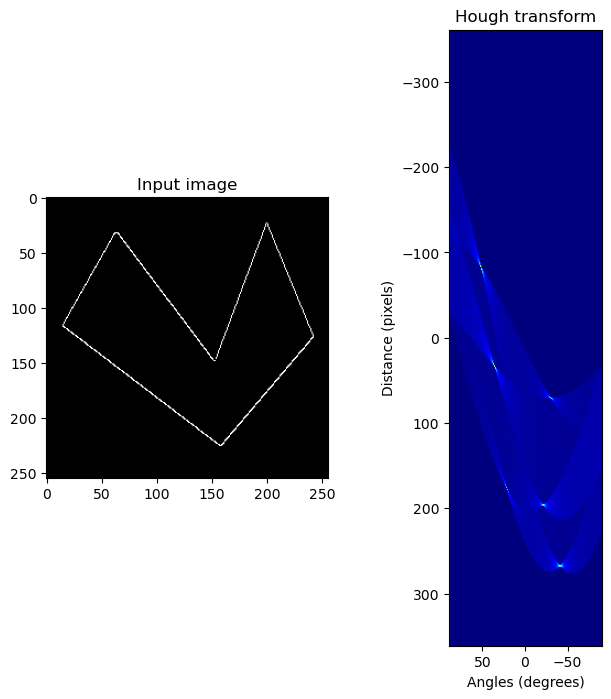

In [305]:
import numpy as np
import cv2
import math
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    cos_the = np.cos(thetas)
    sin_the = np.sin(thetas)
    num_thetas = len(thetas)
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)

    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)


    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):

            rho = diag_len + int(round(x * cos_the[t_idx] + y * sin_the[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos


def plot_line(img, accumulator, thetas, rhos ):

    fig, ax = plt.subplots(1, 2, figsize=(8, 8))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')



file="test2.bmp"
shapes = cv2.imread(file)
shapes_grayscale=np.array(Image.open(file).convert("L"))

# shapes_grayscale = cv2.GaussianBlur(shapes_grayscale, (3, 3), 0)

canny_edges = cv2.Canny(shapes_grayscale, 30, 150)
threshold = 60
ang_bin = 360
accumulator, thetas, rhos = hough_line(canny_edges,int(360/ang_bin))
peak_idxs = np.argwhere(accumulator > threshold)
lines = []
for i in range(len(peak_idxs)):
    rho_idx, theta_idx = peak_idxs[i]
    rho = rhos[rho_idx]
    theta = thetas[theta_idx]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    lines.append((x1, y1, x2, y2))

# # Draw lines on the image
image = Image.fromarray(canny_edges)
s=Image.fromarray(shapes)
draw = ImageDraw.Draw(s)
for line in lines:
    draw.line(line, fill="red", width=2)
fn = "./result/"+file+"_Thres"+str(threshold)+"_AngleBins"+str(ang_bin)+".bmp"
s.save(fn)
print(len(lines))
show_hough_line(canny_edges, accumulator, thetas, rhos)